In [1]:
# ! pip install yfinance
import Ab as ab
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd

# Get data from yahoo finance
sd = dt.datetime(1998,12,4)
ed = dt.datetime(2023,3,14)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ', sd, ed)
# 2x leveraged nasdaq 100 etf
qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD', sd, ed)
# 3x leveraged nasdaq 100 etf
tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ', sd, ed)
#nasdaq 100 index
ndx = ab.StockData('NDX')
ndx.get_data_from_yfinance('NDX', sd, ed)
#S&P 500 etf
spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY', sd, ed)
#nasdaq stocks above 200 day moving average percentage
naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')

ffty = ab.StockData('FFTY')
ffty.get_data_from_yfinance('FFTY',sd,ed+dt.timedelta(days=1))


GPU acceleration is NOT available
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
test_start = dt.datetime(2002,1,1)
test_end = dt.datetime(2023,3,1)
ticker = qld
weekly_buy = weekly_sell = True
long_term_tax_rate = short_term_tax_rate = 0

threshold_strategy = ab.Threshold(name='NAA200R', buy_threshold = 15, sell_threshold = 30, signal_ma_window=20)
threshold_strategy.run_strategy(naa200r, test_start , test_end)
naa200r_threshold_bt = ab.BackTest()
naa200r_threshold_bt.run_backtest(threshold_strategy, ticker, test_start , test_end, )
naa200r_threshold_bt.performance_summary()


NAA200R 15/30 MA 20:
cumulative return      : 5837.86%
compound anual return  : 27.1543%
max_drawdown           : -43.97%
sharp_ratio            : 5.68%
average of daily return: 0.1196%
std of daily return    : 2.1063%
number of trades       : 43,
trading days           : 6097,
batting Average        : 40.48%
Gain Average           : 52.41%
Loss Average           : -5.88%
Risk Reward Ratio      : 8.91
Gain STD               : 77.10%
Loss STD               : 4.09%
        


In [10]:
long_term_tax_rate, short_term_tax_rate = 0.2, 0.5

naa200r_threshold_bt_tax = ab.BackTest()
naa200r_threshold_bt_tax.run_backtest(threshold_strategy, ticker, test_start , test_end, 
                                  long_term_tax_rate = long_term_tax_rate, 
                                  short_term_tax_rate = short_term_tax_rate, verbose =False)
naa200r_threshold_bt_tax.performance_summary()


NAA200R 15/30 MA 20:
cumulative return      : 2628.47%
compound anual return  : 21.4691%
max_drawdown           : -53.22%
sharp_ratio            : 4.76%
average of daily return: 0.1018%
std of daily return    : 2.1392%
number of trades       : 53,
trading days           : 6097,
batting Average        : 40.48%
Gain Average           : 52.41%
Loss Average           : -5.88%
Risk Reward Ratio      : 8.91
Gain STD               : 77.10%
Loss STD               : 4.09%
        


In [11]:
long_term_tax_rate, short_term_tax_rate = 0, 0
buy_and_hold = ab.BuyAndHold() 
buy_and_hold.run_strategy(ticker, test_start,test_end)
bt = ab.BackTest()
bt.run_backtest(buy_and_hold, ticker, test_start, test_end, 
                                  long_term_tax_rate = long_term_tax_rate, 
                                  short_term_tax_rate = short_term_tax_rate, )
bt.performance_summary()


Buy and Hold:
cumulative return      : 1718.57%
compound anual return  : 18.6047%
max_drawdown           : -81.23%
sharp_ratio            : 3.87%
average of daily return: 0.1091%
std of daily return    : 2.8204%
number of trades       : 2,
trading days           : 6097,
batting Average        : 100.00%
Gain Average           : 1718.57%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        


In [12]:
long_term_tax_rate, short_term_tax_rate = 0.2, 0.5
buy_and_hold = ab.BuyAndHold() 
buy_and_hold.run_strategy(ticker, test_start,test_end)
bt = ab.BackTest()
bt.run_backtest(buy_and_hold, ticker, test_start, test_end, 
                                  long_term_tax_rate = long_term_tax_rate, 
                                  short_term_tax_rate = short_term_tax_rate, )
bt.performance_summary()


Buy and Hold:
cumulative return      : 1374.86%
compound anual return  : 17.1521%
max_drawdown           : -81.23%
sharp_ratio            : 3.69%
average of daily return: 0.1047%
std of daily return    : 2.8376%
number of trades       : 2,
trading days           : 6097,
batting Average        : 100.00%
Gain Average           : 1718.57%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        


In [6]:
#buy and hold strategy vs various  strategies
def backtestAll(ticker:ab.StockData, indicator:ab.StockData, test_start:dt.datetime,test_end:dt.datetime, verbose = True, weekly_buy=False, weekly_sell=False):
    perf_summary = pd.DataFrame()
    buy_and_hold = ab.BuyAndHold() 
    buy_and_hold.run_strategy(ticker, test_start,test_end)
    bt = ab.BackTest()
    bt.run_backtest(buy_and_hold, ticker, test_start, test_end)

    macross_strategy = ab.MACross('Ma Cross',50, 200)
    macross_strategy.run_strategy(indicator, test_start ,test_end)
    ma_cross_bt = ab.BackTest()
    ma_cross_bt.run_backtest(macross_strategy, ticker,test_start, test_end, weekly_buy,weekly_sell)

    threshold_strategy = ab.Threshold(name='NAA200R', buy_threshold = 15, sell_threshold = 30, signal_ma_window=20)
    threshold_strategy.run_strategy(naa200r, test_start , test_end)
    naa200r_threshold_bt = ab.BackTest()
    naa200r_threshold_bt.run_backtest(threshold_strategy, ticker, test_start , test_end, weekly_buy,weekly_sell)

    threshold_strategy_2 = ab.Threshold(name='NAA200R', buy_threshold = 15, sell_threshold = 30, signal_ma_window=40)
    threshold_strategy_2.run_strategy(naa200r, test_start , test_end)
    naa200r_threshold_bt_2 = ab.BackTest()
    naa200r_threshold_bt_2.run_backtest(threshold_strategy_2, ticker,test_start , test_end, weekly_buy,weekly_sell)

    ma_threshold = ab.MAThreshold('NAA200R SMA21', ma_window = 21,buy_threshold = 1, sell_threshold = 1)
    ma_threshold.run_strategy(indicator, test_start,test_end)
    ma_threshold_bt = ab.BackTest()
    ma_threshold_bt.run_backtest(ma_threshold, ticker,test_start, test_end, weekly_buy,weekly_sell)

    ma_threshold2 = ab.MAThreshold('SMA200', ma_window = 200,buy_threshold = 1.03, sell_threshold = 0.95)
    ma_threshold2.run_strategy(indicator, test_start,test_end)
    ma_threshold2_bt = ab.BackTest()
    ma_threshold2_bt.run_backtest(ma_threshold2, ticker,test_start, test_end, weekly_buy,weekly_sell)

    fftyspy_stg = ab.fftyspy_stg(ffty_sell_threshold = 0.95, ffty_buy_threshold = 1.02, 
                                            spy_consecutive_buy_threshold = 1, spy_consecutive_days = 20,
                                            spy_max_off_new_high_pct = -0.2)
    fftyspy_stg.run_strategy([ffty,spy], test_start, test_end)
    fftyspy_bh = ab.BackTest()
    fftyspy_bh.run_backtest(fftyspy_stg,ticker,test_start,test_end)
    
    #WeeklyMAThreshold = ab.WeeklyMAThreshold('2W SMA200', ma_window =40,buy_threshold=1,sell_threshold=1)
    #WeeklyMAThreshold.run_strategy(indicator, test_start , test_end)
    #WeeklyMAThreshold_bt = ab.BackTest()
    #WeeklyMAThreshold_bt.run_backtest(WeeklyMAThreshold, ticker, test_start , test_end, weekly_buy,weekly_sell)

    print('Backtest for', ticker.ticker)
    bt.performance_summary()
    ma_cross_bt.performance_summary()
    naa200r_threshold_bt.performance_summary()
    naa200r_threshold_bt_2.performance_summary()
    ma_threshold_bt.performance_summary()
    ma_threshold2_bt.performance_summary()
    fftyspy_bh.performance_summary()
    #WeeklyMAThreshold_bt.performance_summary()
    
    fig = plt.figure(figsize=(16,4))
    plt.plot(bt.balance.index, bt.balance['Total'], label = bt.name ,color = 'blue')
    plt.plot(ma_cross_bt.balance.index, ma_cross_bt.balance['Total'], label = ma_cross_bt.name, color = 'red')
    plt.plot(naa200r_threshold_bt.balance.index, naa200r_threshold_bt.balance['Total'], label = naa200r_threshold_bt.name, color = 'green')
    plt.plot(naa200r_threshold_bt_2.balance.index, naa200r_threshold_bt_2.balance['Total'], label = naa200r_threshold_bt_2.name)
    plt.plot(ma_threshold_bt.balance.index, ma_threshold_bt.balance['Total'], label = ma_threshold_bt.name)
    plt.plot(ma_threshold2_bt.balance.index, ma_threshold2_bt.balance['Total'], label = ma_threshold2_bt.name)
    plt.plot(fftyspy_bh.balance.index, fftyspy_bh.balance['Total'], label = fftyspy_bh.name)
    #plt.plot(WeeklyMAThreshold_bt.balance.index, WeeklyMAThreshold_bt.balance['Total'], label = WeeklyMAThreshold_bt.name)
 
    plt.legend()
    plt.title('Backtesting for {}'.format(ticker.ticker))
    plt.show()


    for strategy in [bt,ma_cross_bt,naa200r_threshold_bt, naa200r_threshold_bt_2, ma_threshold_bt, ma_threshold2_bt]:
        perf_summary = pd.concat([perf_summary, strategy.summary_result])
        
    return perf_summary


/home/zishuowang/backtesting/Ab.py:186: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  sd = indicator.data.index[indicator.data.index.get_loc(


Backtest for QQQ

Buy and Hold:
cumulative return      : 626.00%
compound anual return  : 9.8998%
max_drawdown           : -51.86%
sharp_ratio            : 3.28%
average of daily return: 0.0479%
std of daily return    : 1.4606%
number of trades       : 2,
trading days           : 7728,
batting Average        : 100.00%
Gain Average           : 626.00%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        

Ma Cross 50/200:
cumulative return      : 612.60%
compound anual return  : 9.8024%
max_drawdown           : -28.56%
sharp_ratio            : 4.10%
average of daily return: 0.0422%
std of daily return    : 1.0298%
number of trades       : 16,
trading days           : 7728,
batting Average        : 60.00%
Gain Average           : 30.01%
Loss Average           : -5.09%
Risk Reward Ratio      : 5.90
Gain STD               : 18.66%
Loss STD               : 2.87%
        

NAA200R 15/30 MA 20:
cumulative return      : 

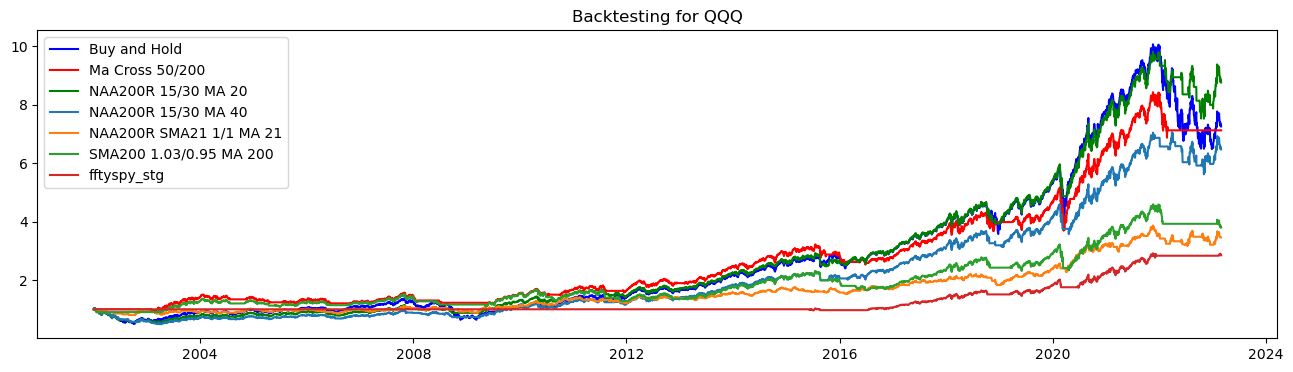

,name,num_trades,cumulative_return,annual_return,max_drawdown,sharp_ratio,avg_daily_return,std_daily_return,num_trading_days,batting Average,Gain Average,Loss Average,Risk Reward Ratio,Gain STD,Loss STD
0,Buy and Hold,2,6.260035,0.098998,-0.518599,0.032792,0.000479,0.014606,7728,1.000000,6.260035,NaN,NaN,NaN,NaN
0,Ma Cross 50/200,16,6.126033,0.098024,-0.285594,0.040978,0.000422,0.010298,7728,0.600000,0.300059,-0.050888,5.896450,0.186624,0.028651
0,NAA200R 15/30 MA 20,52,7.764845,0.108901,-0.455497,0.041600,0.000472,0.011349,7728,0.392157,0.218562,-0.040408,5.408849,0.277334,0.063037
0,NAA200R 15/30 MA 40,52,5.474042,0.093018,-0.485940,0.037049,0.000413,0.011146,7728,0.333333,0.231797,-0.036423,6.364074,0.269320,0.057104
0,NAA200R SMA21 1/1 MA 21,295,2.460573,0.060898,-0.197827,0.031277,0.000271,0.008651,7728,0.316327,0.045810,-0.014045,3.261759,0.041316,0.010765
0,SMA200 1.03/0.95 MA 200,19,2.799343,0.065627,-0.284460,0.030781,0.000298,0.009668,7728,0.500000,0.262363,-0.068783,3.814340,0.217695,0.031160


In [7]:
test_start = dt.datetime(2002,1,1)
test_end = dt.datetime(2023,3,1)

perf_summary = backtestAll(qqq, qqq, test_start, test_end, verbose = False)
display(perf_summary)

Backtest for QLD

Buy and Hold:
cumulative return      : 2162.65%
compound anual return  : 27.1163%
max_drawdown           : -63.19%
sharp_ratio            : 4.96%
average of daily return: 0.1300%
std of daily return    : 2.6215%
number of trades       : 2,
trading days           : 4748,
batting Average        : 100.00%
Gain Average           : 2162.65%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        

Ma Cross 50/200:
cumulative return      : 1348.75%
compound anual return  : 22.8308%
max_drawdown           : -51.72%
sharp_ratio            : 4.82%
average of daily return: 0.1062%
std of daily return    : 2.2015%
number of trades       : 10,
trading days           : 4748,
batting Average        : 66.67%
Gain Average           : 69.93%
Loss Average           : -8.51%
Risk Reward Ratio      : 8.22
Gain STD               : 50.82%
Loss STD               : 7.95%
        

NAA200R 15/30 MA 20:
cumulative return   

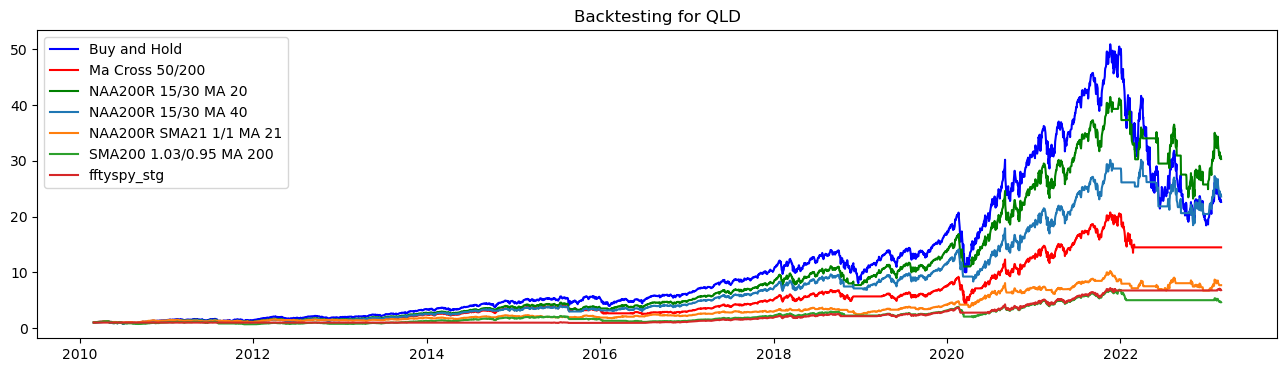

,name,num_trades,cumulative_return,annual_return,max_drawdown,sharp_ratio,avg_daily_return,std_daily_return,num_trading_days,batting Average,Gain Average,Loss Average,Risk Reward Ratio,Gain STD,Loss STD
0,Buy and Hold,2,21.626480,0.271163,-0.631892,0.049583,0.001300,0.026215,4748,1.000000,21.626480,NaN,NaN,NaN,NaN
0,Ma Cross 50/200,10,13.487500,0.228308,-0.517154,0.048243,0.001062,0.022015,4748,0.666667,0.699260,-0.085092,8.217725,0.508244,0.079489
0,NAA200R 15/30 MA 20,31,29.324661,0.300123,-0.439676,0.059819,0.001270,0.021224,4748,0.433333,0.572899,-0.062696,9.137693,0.856602,0.036434
0,NAA200R 15/30 MA 40,26,22.605016,0.275310,-0.407344,0.057147,0.001181,0.020674,4748,0.360000,0.716698,-0.048447,14.793573,0.853498,0.042293
0,NAA200R SMA21 1/1 MA 21,171,6.704482,0.170068,-0.343567,0.047494,0.000749,0.015772,4748,0.347059,0.093169,-0.026774,3.479878,0.088711,0.021168
0,SMA200 1.03/0.95 MA 200,13,3.645437,0.125407,-0.496784,0.033684,0.000669,0.019869,4748,0.416667,0.754412,-0.134309,5.616989,0.597498,0.043176


In [8]:
test_start = dt.datetime(2010,3,1)
test_end = dt.datetime(2023,3,1)
perf_summary = backtestAll(qld, qqq, test_start, test_end, verbose = False)
display(perf_summary)

Backtest for TQQQ

Buy and Hold:
cumulative return      : 2398.06%
compound anual return  : 30.7576%
max_drawdown           : -81.11%
sharp_ratio            : 4.71%
average of daily return: 0.1846%
std of daily return    : 3.9195%
number of trades       : 2,
trading days           : 4383,
batting Average        : 100.00%
Gain Average           : 2398.06%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        

Ma Cross 50/200:
cumulative return      : 232.00%
compound anual return  : 10.5168%
max_drawdown           : -69.41%
sharp_ratio            : 2.86%
average of daily return: 0.0762%
std of daily return    : 2.6650%
number of trades       : 12,
trading days           : 4383,
batting Average        : 54.55%
Gain Average           : 49.08%
Loss Average           : -15.69%
Risk Reward Ratio      : 3.13
Gain STD               : 51.14%
Loss STD               : 13.16%
        

NAA200R 15/30 MA 20:
cumulative return 

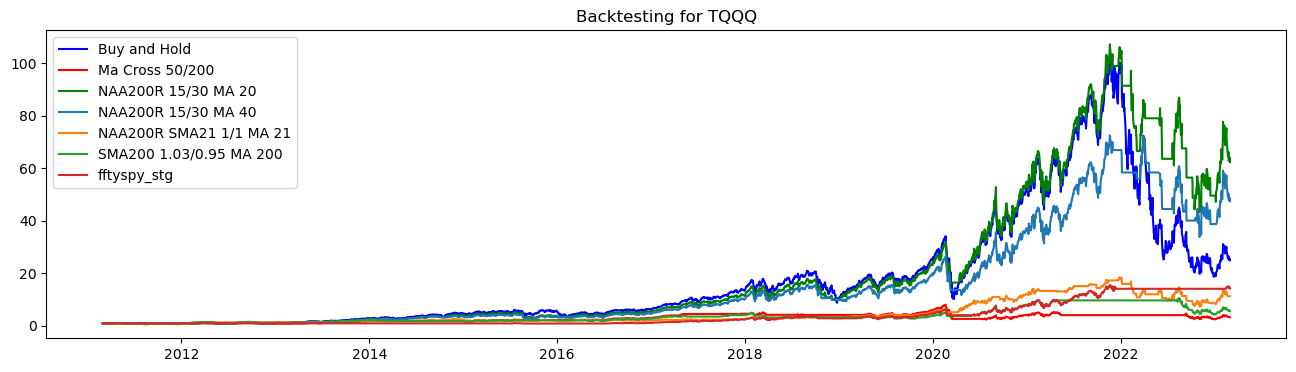

,name,num_trades,cumulative_return,annual_return,max_drawdown,sharp_ratio,avg_daily_return,std_daily_return,num_trading_days,batting Average,Gain Average,Loss Average,Risk Reward Ratio,Gain STD,Loss STD
0,Buy and Hold,2,23.980591,0.307576,-0.811138,0.047099,0.001846,0.039195,4383,1.000000,23.980591,NaN,NaN,NaN,NaN
0,Ma Cross 50/200,12,2.320005,0.105168,-0.694114,0.028596,0.000762,0.026650,4383,0.545455,0.490847,-0.156871,3.128982,0.511422,0.131628
0,NAA200R 15/30 MA 20,30,61.368340,0.411173,-0.596052,0.059445,0.001869,0.031445,4383,0.413793,1.065235,-0.093450,11.399037,1.731717,0.054194
0,NAA200R 15/30 MA 40,25,46.452589,0.379394,-0.553646,0.057287,0.001752,0.030579,4383,0.333333,1.367949,-0.075301,18.166507,1.705047,0.058969
0,NAA200R SMA21 1/1 MA 21,152,10.278054,0.223732,-0.606457,0.046862,0.001058,0.022579,4383,0.470199,0.097333,-0.045752,2.127420,0.119703,0.038794
0,SMA200 1.03/0.95 MA 200,28,4.712943,0.156303,-0.597107,0.036304,0.000859,0.023673,4383,0.555556,0.280037,-0.100647,2.782381,0.429411,0.103000


In [9]:
test_start = dt.datetime(2011,3,1)
test_end = dt.datetime(2023,3,1)
perf_summary = backtestAll(tqqq, naa200r, test_start, test_end, verbose = False)
display(perf_summary)


/home/zishuowang/backtesting/Ab.py:186: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  sd = indicator.data.index[indicator.data.index.get_loc(


Backtest for QQQ

Buy and Hold:
cumulative return      : 626.00%
compound anual return  : 9.8998%
max_drawdown           : -51.86%
sharp_ratio            : 3.28%
average of daily return: 0.0479%
std of daily return    : 1.4606%
number of trades       : 2,
trading days           : 7728,
batting Average        : 100.00%
Gain Average           : 626.00%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        

Ma Cross 50/200:
cumulative return      : 612.60%
compound anual return  : 9.8024%
max_drawdown           : -28.56%
sharp_ratio            : 4.10%
average of daily return: 0.0422%
std of daily return    : 1.0298%
number of trades       : 16,
trading days           : 7728,
batting Average        : 60.00%
Gain Average           : 30.01%
Loss Average           : -5.09%
Risk Reward Ratio      : 5.90
Gain STD               : 18.66%
Loss STD               : 2.87%
        

NAA200R 15/30 MA 20:
cumulative return      : 

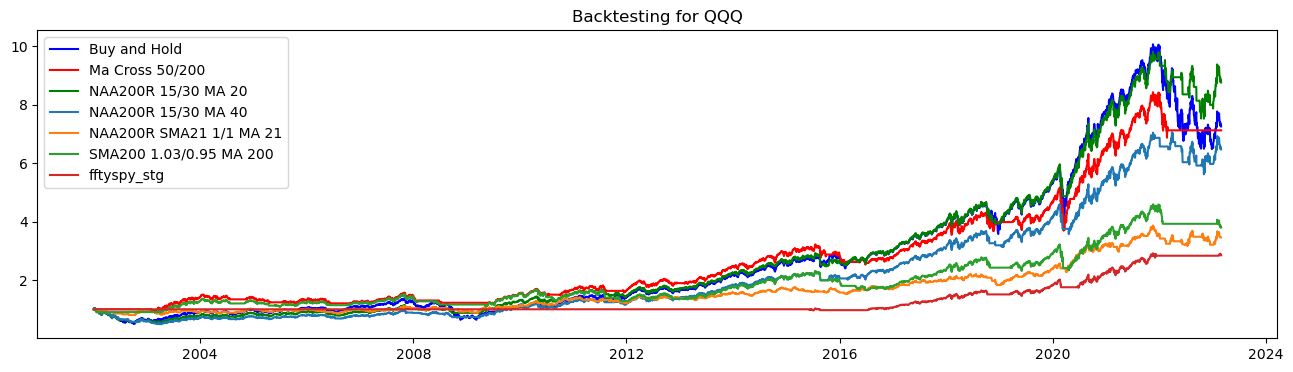

,name,num_trades,cumulative_return,annual_return,max_drawdown,sharp_ratio,avg_daily_return,std_daily_return,num_trading_days,batting Average,Gain Average,Loss Average,Risk Reward Ratio,Gain STD,Loss STD
0,Buy and Hold,2,6.260035,0.098998,-0.518599,0.032792,0.000479,0.014606,7728,1.000000,6.260035,NaN,NaN,NaN,NaN
0,Ma Cross 50/200,16,6.126033,0.098024,-0.285594,0.040978,0.000422,0.010298,7728,0.600000,0.300059,-0.050888,5.896450,0.186624,0.028651
0,NAA200R 15/30 MA 20,52,7.764845,0.108901,-0.455497,0.041600,0.000472,0.011349,7728,0.392157,0.218562,-0.040408,5.408849,0.277334,0.063037
0,NAA200R 15/30 MA 40,52,5.474042,0.093018,-0.485940,0.037049,0.000413,0.011146,7728,0.333333,0.231797,-0.036423,6.364074,0.269320,0.057104
0,NAA200R SMA21 1/1 MA 21,295,2.460573,0.060898,-0.197827,0.031277,0.000271,0.008651,7728,0.316327,0.045810,-0.014045,3.261759,0.041316,0.010765
0,SMA200 1.03/0.95 MA 200,19,2.799343,0.065627,-0.284460,0.030781,0.000298,0.009668,7728,0.500000,0.262363,-0.068783,3.814340,0.217695,0.031160


In [10]:
test_start = dt.datetime(2002,1,1)
test_end = dt.datetime(2023,3,1)

perf_summary = backtestAll(qqq, qqq, test_start, test_end, verbose = False, weekly_buy=True, weekly_sell=True)
display(perf_summary)


Backtest for QLD

Buy and Hold:
cumulative return      : 2162.65%
compound anual return  : 27.1163%
max_drawdown           : -63.19%
sharp_ratio            : 4.96%
average of daily return: 0.1300%
std of daily return    : 2.6215%
number of trades       : 2,
trading days           : 4748,
batting Average        : 100.00%
Gain Average           : 2162.65%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        

Ma Cross 50/200:
cumulative return      : 1348.75%
compound anual return  : 22.8308%
max_drawdown           : -51.72%
sharp_ratio            : 4.82%
average of daily return: 0.1062%
std of daily return    : 2.2015%
number of trades       : 10,
trading days           : 4748,
batting Average        : 66.67%
Gain Average           : 69.93%
Loss Average           : -8.51%
Risk Reward Ratio      : 8.22
Gain STD               : 50.82%
Loss STD               : 7.95%
        

NAA200R 15/30 MA 20:
cumulative return   

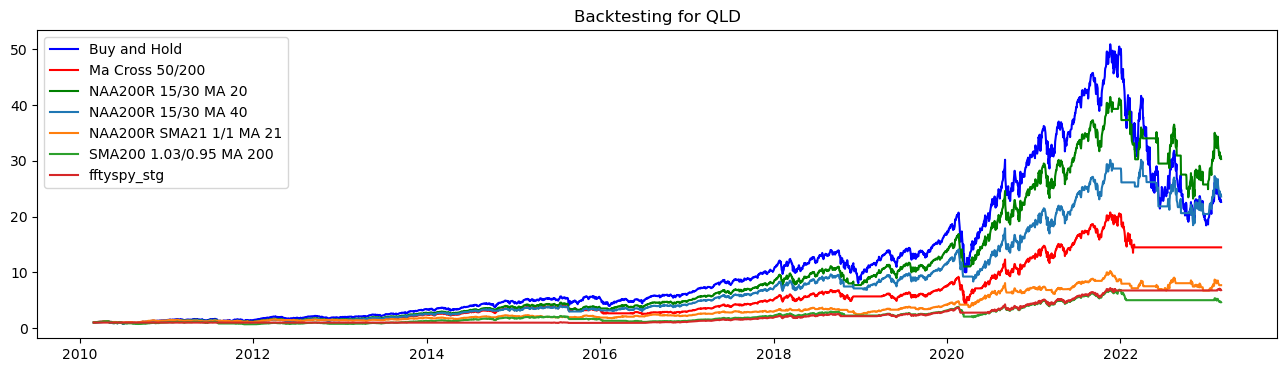

,name,num_trades,cumulative_return,annual_return,max_drawdown,sharp_ratio,avg_daily_return,std_daily_return,num_trading_days,batting Average,Gain Average,Loss Average,Risk Reward Ratio,Gain STD,Loss STD
0,Buy and Hold,2,21.626480,0.271163,-0.631892,0.049583,0.001300,0.026215,4748,1.000000,21.626480,NaN,NaN,NaN,NaN
0,Ma Cross 50/200,10,13.487500,0.228308,-0.517154,0.048243,0.001062,0.022015,4748,0.666667,0.699260,-0.085092,8.217725,0.508244,0.079489
0,NAA200R 15/30 MA 20,31,29.324661,0.300123,-0.439676,0.059819,0.001270,0.021224,4748,0.433333,0.572899,-0.062696,9.137693,0.856602,0.036434
0,NAA200R 15/30 MA 40,26,22.605016,0.275310,-0.407344,0.057147,0.001181,0.020674,4748,0.360000,0.716698,-0.048447,14.793573,0.853498,0.042293
0,NAA200R SMA21 1/1 MA 21,171,6.704482,0.170068,-0.343567,0.047494,0.000749,0.015772,4748,0.347059,0.093169,-0.026774,3.479878,0.088711,0.021168
0,SMA200 1.03/0.95 MA 200,13,3.645437,0.125407,-0.496784,0.033684,0.000669,0.019869,4748,0.416667,0.754412,-0.134309,5.616989,0.597498,0.043176


In [11]:
test_start = dt.datetime(2010,3,1)
test_end = dt.datetime(2023,3,1)
perf_summary = backtestAll(qld, qqq, test_start, test_end, verbose = False, weekly_buy=True, weekly_sell=False)
display(perf_summary)

Backtest for TQQQ

Buy and Hold:
cumulative return      : 2398.06%
compound anual return  : 30.7576%
max_drawdown           : -81.11%
sharp_ratio            : 4.71%
average of daily return: 0.1846%
std of daily return    : 3.9195%
number of trades       : 2,
trading days           : 4383,
batting Average        : 100.00%
Gain Average           : 2398.06%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        

Ma Cross 50/200:
cumulative return      : 2123.88%
compound anual return  : 29.4969%
max_drawdown           : -69.92%
sharp_ratio            : 4.81%
average of daily return: 0.1574%
std of daily return    : 3.2722%
number of trades       : 9,
trading days           : 4383,
batting Average        : 62.50%
Gain Average           : 125.24%
Loss Average           : -17.68%
Risk Reward Ratio      : 7.08
Gain STD               : 87.44%
Loss STD               : 11.43%
        

NAA200R 15/30 MA 20:
cumulative return

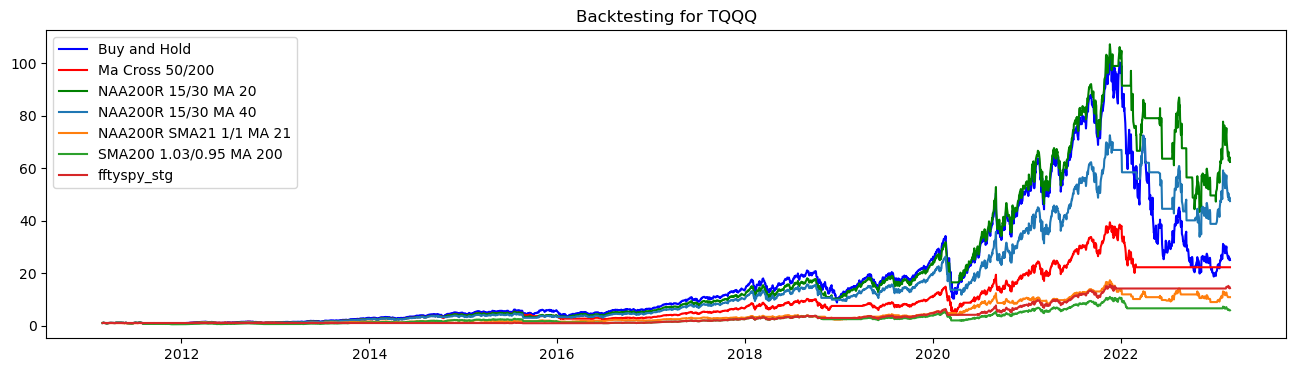

,name,num_trades,cumulative_return,annual_return,max_drawdown,sharp_ratio,avg_daily_return,std_daily_return,num_trading_days,batting Average,Gain Average,Loss Average,Risk Reward Ratio,Gain STD,Loss STD
0,Buy and Hold,2,23.980591,0.307576,-0.811138,0.047099,0.001846,0.039195,4383,1.000000,23.980591,NaN,NaN,NaN,NaN
0,Ma Cross 50/200,9,21.238802,0.294969,-0.699221,0.048095,0.001574,0.032722,4383,0.625000,1.252413,-0.176775,7.084787,0.874368,0.114258
0,NAA200R 15/30 MA 20,30,61.368340,0.411173,-0.596052,0.059445,0.001869,0.031445,4383,0.413793,1.065235,-0.093450,11.399037,1.731717,0.054194
0,NAA200R 15/30 MA 40,25,46.452589,0.379394,-0.553646,0.057287,0.001752,0.030579,4383,0.333333,1.367949,-0.075301,18.166507,1.705047,0.058969
0,NAA200R SMA21 1/1 MA 21,159,9.844701,0.219742,-0.468530,0.045483,0.001067,0.023465,4383,0.348101,0.134468,-0.039716,3.385714,0.133577,0.030813
0,SMA200 1.03/0.95 MA 200,11,4.826895,0.158208,-0.659312,0.034875,0.001026,0.029425,4383,0.400000,1.488728,-0.231260,6.437453,0.930659,0.072877


In [12]:
test_start = dt.datetime(2011,3,1)
test_end = dt.datetime(2023,3,1)
perf_summary = backtestAll(tqqq, qqq, test_start, test_end, verbose = False, weekly_buy = True, weekly_sell = False)
display(perf_summary)

In [ ]:
test_start = dt.datetime(2015,3,1)
test_end = dt.datetime(2023,3,1)
perf_summary = backtestAll(tqqq, qqq, test_start, test_end, verbose = False, weekly_buy = True, weekly_sell = False)
display(perf_summary)